# TP5 Apprentissage Automatique 2 : Étude comparative

#### Les bibliothèques utilisées pour ce Tp sont  _sklearn_, _pandas_, _numpy_, _matplotlib_ , _time_, et _mlxtend_ .

In [2]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import time
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from mlxtend.evaluate import paired_ttest_5x2cv
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### 1. Charger les données et proposer un pré-traitement si nécessaire.

La fonction ci-dessus nous permet d'importer un jeu de données, éffectuer quelques opérations de prétraitement(remplir les nan par la moyenne de la colonne,centrer et réduire les données) pour nous retourner les labels d'un coté et le reste de colonnes du dataset de l'autre.

In [3]:
def load_CSV_dataset(name):
    ## load data
    dataset = pd.read_csv(name)
    ### PREPROCESSING
    if name == 'spambase.csv':
        da1 = dataset['class']
        da= dataset.loc[:, dataset.columns != 'class']
        da=da.fillna(da.mean())
        trans = preprocessing.StandardScaler()
        da = trans.fit_transform(da)
        da = pd.DataFrame(da)
        result = pd.concat([da,da1],axis=1)
        X = result.loc[:, result.columns != 'class']
        y = result['class']
        return X,y
    else:
    ### Split data for preprocessing
        quantitat_exemples=dataset.select_dtypes(exclude="object")
         ### fill nan
        quantitat_exemples=quantitat_exemples.fillna(quantitat_exemples.mean())
    ### Centrer et reduire each numerical columns 
        quantitat_exemples = preprocessing.StandardScaler().fit_transform(quantitat_exemples)
        quantitat_exemples = pd.DataFrame(quantitat_exemples)
    ### Encode categorical columns
        qualitat_exemples=dataset.select_dtypes(exclude=["float64","int64"])
        label_encoder = preprocessing.LabelEncoder()
        qualitat_exemples = label_encoder.fit_transform(qualitat_exemples)
        qualitat_exemples = pd.DataFrame(qualitat_exemples,columns = ['class'])
    ### merge of qual and quant
        result = pd.concat([quantitat_exemples, qualitat_exemples], axis=1)
        X = result.loc[:, result.columns != 'class']
        y = result['class']
        return X,y

#### _Présentation des jeux de données_

In [4]:
def presentation(name) : 
    dataset = pd.read_csv(name)
    print("Data ",name)
    if name == 'spambase.csv':
        print(" Caractéristiques et nombre d'instances ")
        print(dataset.count())
        print(" ")
        E = dataset['class'].unique()
        print("Nombre de classe : ",E.shape[0])
    else:
        quantitat_exemples=dataset.select_dtypes(exclude="object")
        qualitat_exemples=dataset.select_dtypes(exclude=["float64","int64"])
        label_encoder = preprocessing.LabelEncoder()
        qualitat_exemples = label_encoder.fit_transform(qualitat_exemples)
        qualitat_exemples = pd.DataFrame(qualitat_exemples,columns = ['class'])
        qualitat_exemples
        result = pd.concat([quantitat_exemples, qualitat_exemples], axis=1)
        print(" Caractéristiques et nombre d'instances ")
        print(result.count())
        print(" ")
        E = result['class'].unique()
        print("Nombre de classe : ",E.shape[0])
        print(" ")
        print(" ")

In [5]:
list_data = ['heart.csv','diabetes.csv','vehicle.csv','segment.csv','spambase.csv']
for i in range(len(list_data)):
    presentation(list_data[i])

Data  heart.csv
 Caractéristiques et nombre d'instances 
age                                     270
sex                                     270
chest                                   270
resting_blood_pressure                  270
serum_cholestoral                       270
fasting_blood_sugar                     270
resting_electrocardiographic_results    270
maximum_heart_rate_achieved             270
exercise_induced_angina                 270
oldpeak                                 270
slope                                   270
number_of_major_vessels                 270
thal                                    270
class                                   270
dtype: int64
 
Nombre de classe :  2
 
 
Data  diabetes.csv
 Caractéristiques et nombre d'instances 
preg     768
plas     768
pres     768
skin     768
insu     768
mass     768
pedi     768
age      768
class    768
dtype: int64
 
Nombre de classe :  2
 
 
Data  vehicle.csv
 Caractéristiques et nombre d'instances 
COMPACTNE

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### _Affichage du nuage de points._

        Nous effectuons une Analyse en composantes principales afin de visualiser les 2 et les 3 premières composantes principales.

        L'objectif est d'avoir une idée de la distribution du jeu de données pour nous permettre une bonne interprétation des résultats.

In [6]:
def affichage (data):
    pca = PCA(n_components=4).fit(data)
    test = pca.transform(data)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
#
    ax1.set_title('Nuage de points 2D') 
    ax1.scatter(test[:,0], test[:,1],c =y)
#
    ax2.set_title("Nuage de points 3D")
    ax2=f.gca(projection='3d')
    ax2.scatter3D(test[:,0], test[:,1],test[:,2], c=y)
    plt.show()

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-6-2781f74014b3>:10: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax2=f.gca(projection='3d')


Data : heart.csv


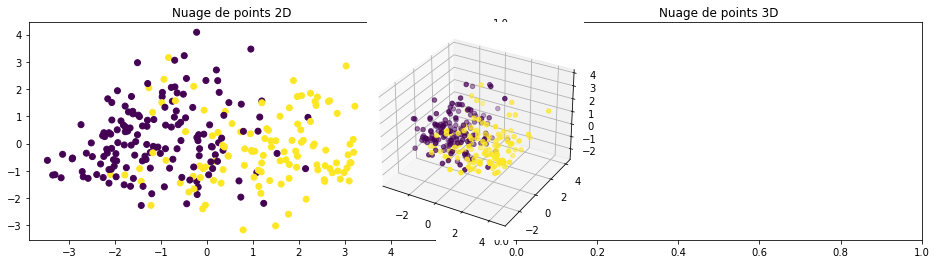

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-6-2781f74014b3>:10: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax2=f.gca(projection='3d')


Data : diabetes.csv


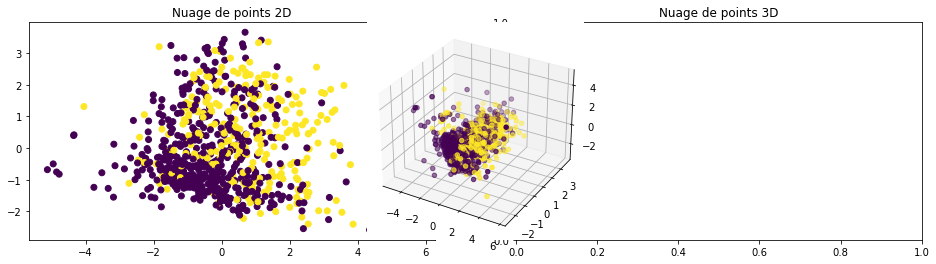

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-6-2781f74014b3>:10: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax2=f.gca(projection='3d')


Data : vehicle.csv


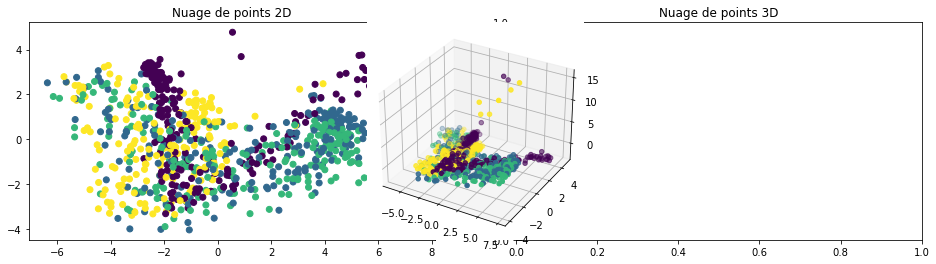

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-6-2781f74014b3>:10: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax2=f.gca(projection='3d')


Data : segment.csv


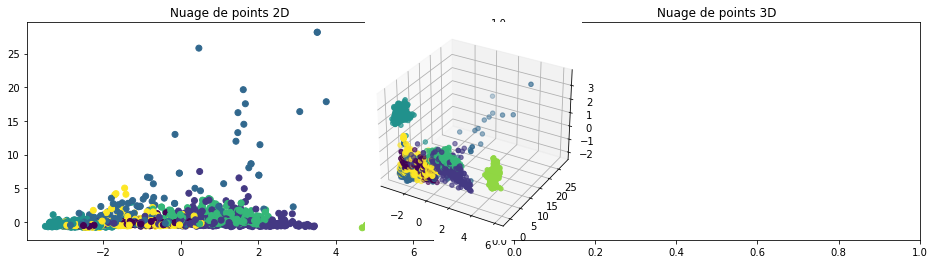

Data : spambase.csv


<ipython-input-6-2781f74014b3>:10: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax2=f.gca(projection='3d')


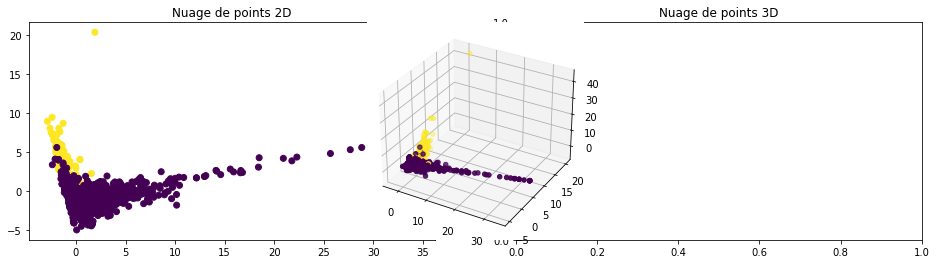

In [7]:
list_data = ['heart.csv','diabetes.csv','vehicle.csv','segment.csv','spambase.csv']
for i in range(len(list_data)):
    data,y = load_CSV_dataset(list_data[i])
##
    print("Data :",list_data[i])
    affichage (data)

### 2. Proposer une procédure de découpage des bases de données respectant les principes vus en cours.

In [8]:
def split_dataset(X,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state=41)
    data = [x_train,x_test,y_train,y_test]
    return data

## Commenataires:
    
    
 Conformément aux principes vus en cours, nous devons diviser les datasets en données d'Apprentissage et de Test.
 Les données de Test quant à elles, seront divisées à nouveau en données d'apprentissage et de validation.
 
 Afin de respecter les prototypes de méthodes qui nous ont été proposées pour ce Tp et de nous faciliter le reste du travail, nous choisissons de séparer les données d'apprentissage et de validation en déhors de la méthode split_dataset. 

### 3. Proposer pour chaque méthode un protocole de sélection d’hyper-paramètres pour que chacune d’elle soit comparée avec son plein potentiel en généralisation.

Les deux méthodes ci-dessus nous permettent de sélectionner les meilleurs paramètrees de nos modèle à savoir : SVM et Régression logistique.
    
Chaque méthode affiche les scores trouvés par cross-validation, la moyenne et l'écart-type de ces scores; Puis affiche les scores moyens de courbes d'apprentissage et de validation.

Sur base de ces résultats, nous pourrions opérer le choix du meilleur hyper-paramètre.

Il est également important de signaler que le seul hyper-paramètre le plus important que nous avons à sélectionner dans notre cas est la valeur de _"C"_. Il est vrai  que l'hyper-paramètre _gamma_ est aussi important pour le SVM; Cependant, nous choisissons de laisser sa valeur par défaut.

Pour le SVM et la Régression logistique, c'est un paramètre de régularisation du modèle.


NOTA: Nous allons également utiliser la fonction _GridSearchCV_ de SKLearn afin de déterminer les meilleurs hyperparamètres d'un modèle.
Nous allons comparer à la fin nos résultats et ceux de sklearn.

In [9]:
def meilleur_paramètre_SVC(data,list_C,kernel): # Prend en paramètre les données d'apprentissage Et les divise en App Val
    List_rep = []
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    for i in range(len(list_C)):
        model = SVC(C = list_C[i],kernel=kernel).fit(x_train,y_train)
        List_rep.append(cross_val_score(model, x_val, y_val, cv=5))
    for i in range(len(List_rep)):
        moy = List_rep[i].mean()
        std = List_rep[i].std()
        print("CV_result_{} {} , Moyenne {}, Ecart-type {}".format(i+1,List_rep[i],moy,std))
        print("   ")
######## GRAPHIQUE
    model = SVC(kernel=kernel).fit(x_train,y_train)
    train_scores, valid_scores = validation_curve(model, X, y, param_name="C", param_range=list_C,cv=5)
    plt.plot([1,2,3,4,5],train_scores.mean(axis=1),label ="Training score")
    plt.plot([1,2,3,4,5],valid_scores.mean(axis=1),label ="Cross-validation score")
    plt.legend()
        
############

def meilleur_paramètre_LR(data,list_C): # Prend en paramètre les données d'apprentissage Et les divise en App Val
    List_rep = []
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    for i in range(len(list_C)):
        model = LogisticRegression(C = list_C[i],random_state=0,max_iter=500).fit(x_train,y_train)
        List_rep.append(cross_val_score(model, x_val, y_val, cv=5))
    for i in range(len(List_rep)):
        moy = List_rep[i].mean()
        std = List_rep[i].std()
        print("CV_result_{} {} , Moyenne {}, Ecart-type {}".format(i+1,List_rep[i],moy,std))
        print("   ")
##
    model = LogisticRegression(random_state=0,max_iter=500).fit(x_train,y_train)
    train_scores, valid_scores = validation_curve(model, X, y, param_name="C", param_range=list_C,cv=5)
    plt.plot([1,2,3,4,5,6],train_scores.mean(axis=1),label ="Training score")
    plt.plot([1,2,3,4,5,6],valid_scores.mean(axis=1),label ="Cross-validation score")
    plt.legend()

#### _COMMENTAIRES:_
    
    Les fonctions implémentées effectuent:
    
    1. La division de données d'Apprentissage en données d'apprentissage et de validation.
    2. L'entrainement du modèle avec les données d'apprentissage.
    3. Calcul le score de validation du modèle par cross-validation avec 5-KFold.
    4. L'affichage de la moyenne et de l'écart-type de 5 scénarios du cross-validation.
    5. L'affichage de la courbe d'Apprentissage et celle de Validation.
  
 De ces résultats, nous pouvons choisir les meilleurs hyperparamètres, celui qui généralise le mieux le modèle.

#### Premier Jeu de données.

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV_result_1 [0.5        0.53333333 0.53333333 0.53333333 0.46666667] , Moyenne 0.5133333333333333, Ecart-type 0.02666666666666666
   
CV_result_2 [0.5625     0.8        0.6        0.53333333 0.53333333] , Moyenne 0.6058333333333332, Ecart-type 0.10012492197250394
   
CV_result_3 [0.9375     0.93333333 0.86666667 0.73333333 0.73333333] , Moyenne 0.8408333333333333, Ecart-type 0.09130230616534896
   
CV_result_4 [0.9375     0.93333333 0.8        0.73333333 0.73333333] , Moyenne 0.8275, Ecart-type 0.0914239210126832
   
CV_result_5 [0.875      0.93333333 0.66666667 0.66666667 0.73333333] , Moyenne 0.775, Ecart-type 0.10979779394667072
   


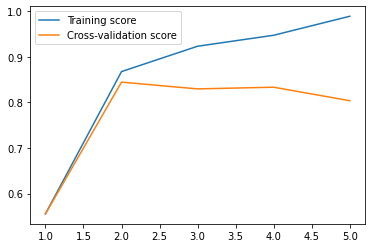

In [10]:
X,y = load_CSV_dataset('heart.csv')
data = split_dataset(X,y)
##
list_C = [0.01,0.1,1,2,10]
meilleur_paramètre_SVC(data,list_C,'rbf')

#### Commentaire : 

Valeur de C retenue est _1_. Pour cette valeur, nous avons la meilleure moyenne de score et la variance la plus petite de tous les autres scénarios de cross-validation. Nous avons également retenu cette valeur parce que à ce niveau, la courbe de validation a tendance à augmenter et à rester constante. Au délà de cette valeur, nous fairons face à une situation de overfitting c'est à dire que le score en apprentissage augmente  mais la validation diminue : mauvais modèle en généralisation.

CV_result_1 [0.875      0.86666667 0.73333333 0.86666667 0.8       ] , Moyenne 0.8283333333333334, Ecart-type 0.0546707315561891
   
CV_result_2 [0.875      0.93333333 0.8        0.93333333 0.8       ] , Moyenne 0.8683333333333334, Ecart-type 0.05972157622389637
   
CV_result_3 [0.875      0.86666667 0.93333333 0.93333333 0.73333333] , Moyenne 0.8683333333333334, Ecart-type 0.07310570733153772
   
CV_result_4 [0.875      0.8        0.93333333 1.         0.66666667] , Moyenne 0.8550000000000001, Ecart-type 0.11493959766377779
   
CV_result_5 [0.8125     0.6        0.93333333 0.86666667 0.66666667] , Moyenne 0.7758333333333333, Ecart-type 0.12428685458334775
   


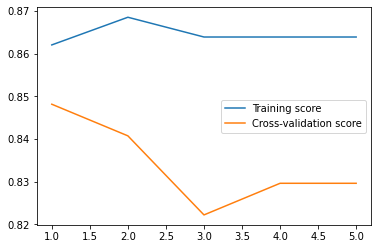

In [11]:
list_C = [0.01,0.1,1,10,100]
meilleur_paramètre_SVC(data,list_C,'linear')

### Commentaire : 

Nous trouvons le même score pour C = 0.1 et C =1. Cependant, nous retenons la valeur de C = _0.1_  Pour cette valeur, La courbe d'apprentissage se stabilise et celle de validation augmente. Contrairement à la valeur de C =0.1 où les deux courbes diminuent.

CV_result_1 [0.9375     0.8        0.86666667 0.8        0.86666667] , Moyenne 0.8541666666666667, Ecart-type 0.051234753829797974
   
CV_result_2 [0.875      0.93333333 0.86666667 0.86666667 0.73333333] , Moyenne 0.8549999999999999, Ecart-type 0.06574360974438676
   
CV_result_3 [0.875      0.93333333 0.93333333 0.86666667 0.73333333] , Moyenne 0.8683333333333334, Ecart-type 0.07310570733153772
   
CV_result_4 [0.875      0.93333333 0.93333333 0.86666667 0.73333333] , Moyenne 0.8683333333333334, Ecart-type 0.07310570733153772
   
CV_result_5 [0.875      0.86666667 0.93333333 0.86666667 0.73333333] , Moyenne 0.8549999999999999, Ecart-type 0.06574360974438676
   
CV_result_6 [0.875      0.8        0.93333333 0.86666667 0.66666667] , Moyenne 0.8283333333333334, Ecart-type 0.09122621455602674
   


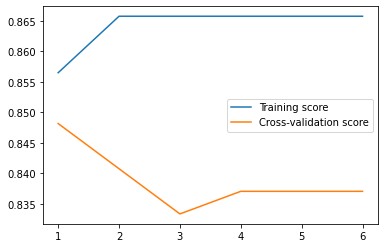

In [12]:
list_C = [0.01,1,2,3,5,10]
meilleur_paramètre_LR(data,list_C)

### Commentaire : 

Nous trouvons le même score et la même variance pour C = 2 et C =3. Cependant, nous retenons la valeur de C = _2_. Pour cette valeur, La courbe d'apprentissage se stabilise et celle de validation augmente. Contrairement à la valeur de C = 3 où les deux courbes se stabilisent.

#### Deuxième Jeu de données.

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV_result_1 [0.6744186  0.6744186  0.65116279 0.65116279 0.65116279] , Moyenne 0.6604651162790699, Ecart-type 0.011392975547828702
   
CV_result_2 [0.6744186  0.6744186  0.65116279 0.65116279 0.65116279] , Moyenne 0.6604651162790699, Ecart-type 0.011392975547828702
   
CV_result_3 [0.72093023 0.69767442 0.81395349 0.76744186 0.79069767] , Moyenne 0.758139534883721, Ecart-type 0.04313310928137536
   
CV_result_4 [0.72093023 0.69767442 0.72093023 0.79069767 0.79069767] , Moyenne 0.7441860465116279, Ecart-type 0.038914419838794206
   
CV_result_5 [0.69767442 0.65116279 0.65116279 0.69767442 0.74418605] , Moyenne 0.6883720930232557, Ecart-type 0.03480611522580408
   


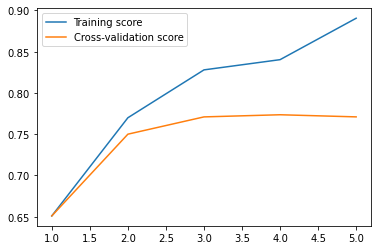

In [13]:
X,y = load_CSV_dataset('diabetes.csv')
data = split_dataset(X,y)
list_C = [0.01,0.1,1,2,10]
meilleur_paramètre_SVC(data,list_C,'rbf')

### Commentaire : 

Valeur de C retenue est _1_. Pour cette valeur, nous avons la meilleure moyenne de score de tous les autres scénarios de cross-validation. Nous avons également retenu cette valeur parce que à ce niveau, la courbe de validation a tendance à rester constante. Au délà de cette valeur, nous fairons face à une situation de overfitting c'est à dire que le score en apprentissage augmente  mais la validation diminue : mauvais modèle en généralisation.

CV_result_1 [0.69767442 0.69767442 0.74418605 0.74418605 0.79069767] , Moyenne 0.7348837209302326, Ecart-type 0.03480611522580408
   
CV_result_2 [0.72093023 0.72093023 0.76744186 0.79069767 0.81395349] , Moyenne 0.7627906976744186, Ecart-type 0.037209302325581416
   
CV_result_3 [0.72093023 0.72093023 0.76744186 0.76744186 0.79069767] , Moyenne 0.7534883720930232, Ecart-type 0.027906976744186067
   
CV_result_4 [0.72093023 0.69767442 0.76744186 0.76744186 0.79069767] , Moyenne 0.7488372093023256, Ecart-type 0.03417892664348621
   
CV_result_5 [0.72093023 0.69767442 0.76744186 0.76744186 0.79069767] , Moyenne 0.7488372093023256, Ecart-type 0.03417892664348621
   


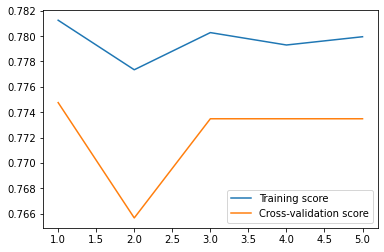

In [14]:
list_C = [0.01,0.1,1,2,10]
meilleur_paramètre_SVC(data,list_C,'linear')

### Commentaire : 

Valeur de C retenue est _1_. Certes, nous n'avons pas la meilleure valeur de score avec C =1 mais Nous le retenons à cause de la variance. C'est donc un compromis.

CV_result_1 [0.69767442 0.62790698 0.6744186  0.76744186 0.76744186] , Moyenne 0.7069767441860465, Ecart-type 0.05424141297530513
   
CV_result_2 [0.69767442 0.72093023 0.79069767 0.74418605 0.79069767] , Moyenne 0.7488372093023256, Ecart-type 0.03720930232558139
   
CV_result_3 [0.69767442 0.72093023 0.79069767 0.74418605 0.79069767] , Moyenne 0.7488372093023256, Ecart-type 0.03720930232558139
   
CV_result_4 [0.69767442 0.72093023 0.79069767 0.74418605 0.79069767] , Moyenne 0.7488372093023256, Ecart-type 0.03720930232558139
   
CV_result_5 [0.69767442 0.72093023 0.79069767 0.74418605 0.79069767] , Moyenne 0.7488372093023256, Ecart-type 0.03720930232558139
   
CV_result_6 [0.69767442 0.72093023 0.79069767 0.74418605 0.79069767] , Moyenne 0.7488372093023256, Ecart-type 0.03720930232558139
   


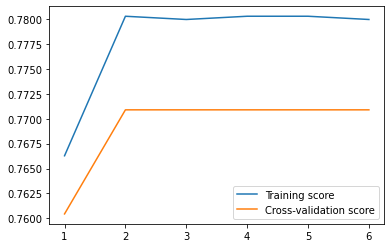

In [15]:
list_C = [0.01,1,2,3,5,10]
meilleur_paramètre_LR(data,list_C)

### Commentaire : 

Nous trouvons le même score et la même variance pour C = 2 et C =3. Cependant, nous retenons la valeur de C = _3_. Pour cette valeur, La courbe d'apprentissage se stabilise et celle de validation augmente.

#### Troisième Jeu de données.

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV_result_1 [0.27083333 0.27083333 0.27659574 0.27659574 0.27659574] , Moyenne 0.274290780141844, Ecart-type 0.0028229934978884286
   
CV_result_2 [0.41666667 0.5        0.55319149 0.42553191 0.40425532] , Moyenne 0.45992907801418437, Ecart-type 0.057372335932359395
   
CV_result_3 [0.77083333 0.79166667 0.68085106 0.80851064 0.68085106] , Moyenne 0.7465425531914894, Ecart-type 0.05494909414665404
   
CV_result_4 [0.79166667 0.60416667 0.76595745 0.80851064 0.70212766] , Moyenne 0.7344858156028369, Ecart-type 0.07452505419678034
   
CV_result_5 [0.8125     0.64583333 0.72340426 0.72340426 0.70212766] , Moyenne 0.7214539007092199, Ecart-type 0.05364508135686831
   


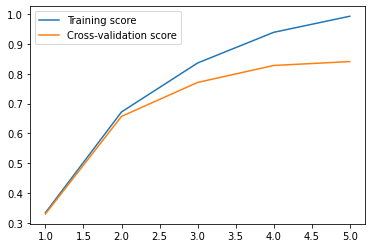

In [16]:
X,y = load_CSV_dataset('vehicle.csv')
data = split_dataset(X,y)
list_C = [0.01,0.1,1,10,100]
meilleur_paramètre_SVC(data,list_C,'rbf')

### Commentaire : 

Valeur de C retenue est _10_.

CV_result_1 [0.47916667 0.5        0.46808511 0.4893617  0.5106383 ] , Moyenne 0.48945035460992903, Ecart-type 0.014983056339236151
   
CV_result_2 [0.72916667 0.72916667 0.63829787 0.76595745 0.78723404] , Moyenne 0.7299645390070922, Ecart-type 0.05094965441833555
   
CV_result_3 [0.77083333 0.72916667 0.68085106 0.82978723 0.74468085] , Moyenne 0.7510638297872341, Ecart-type 0.049067847561336954
   
CV_result_4 [0.77083333 0.72916667 0.68085106 0.80851064 0.70212766] , Moyenne 0.7382978723404255, Ecart-type 0.04621728625106689
   
CV_result_5 [0.79166667 0.70833333 0.70212766 0.74468085 0.76595745] , Moyenne 0.7425531914893616, Ecart-type 0.03396952124808727
   


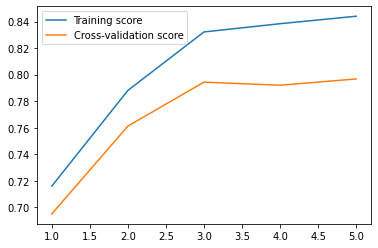

In [17]:
list_C = [0.01,0.1,1,2,10]
meilleur_paramètre_SVC(data,list_C,'linear')

### Commentaire : 

Valeur de C retenue est _10_.

Nous aurions pû retenir la dernière valeur de C mais sa variance est grande.

CV_result_1 [0.58333333 0.66666667 0.57446809 0.61702128 0.61702128] , Moyenne 0.6117021276595744, Ecart-type 0.03246182267048454
   
CV_result_2 [0.75       0.77083333 0.70212766 0.80851064 0.78723404] , Moyenne 0.7637411347517731, Ecart-type 0.036308576268262525
   
CV_result_3 [0.79166667 0.77083333 0.72340426 0.80851064 0.78723404] , Moyenne 0.7763297872340426, Ecart-type 0.029055301629635395
   
CV_result_4 [0.79166667 0.77083333 0.74468085 0.80851064 0.80851064] , Moyenne 0.7848404255319149, Ecart-type 0.024397317746499926
   
CV_result_5 [0.79166667 0.77083333 0.74468085 0.78723404 0.80851064] , Moyenne 0.7805851063829787, Ecart-type 0.021591930394852327
   
CV_result_6 [0.79166667 0.75       0.74468085 0.78723404 0.80851064] , Moyenne 0.7764184397163121, Ecart-type 0.02483788795437937
   


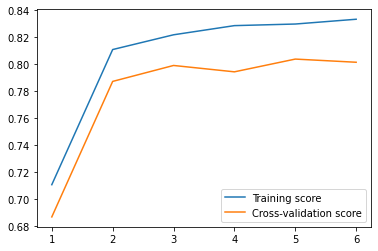

In [18]:
list_C = [0.01,1,2,3,5,10]
meilleur_paramètre_LR(data,list_C)

### Commentaire : 

Valeur de C retenue est _5_.

#### Quatrième Jeu de données.

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV_result_1 [0.15384615 0.15384615 0.15503876 0.1627907  0.1627907 ] , Moyenne 0.15766249254621348, Ecart-type 0.004209746593851593
   
CV_result_2 [0.86923077 0.81538462 0.8372093  0.90697674 0.82170543] , Moyenne 0.8501013714967203, Ecart-type 0.033995676722428474
   
CV_result_3 [0.90769231 0.88461538 0.89147287 0.93023256 0.88372093] , Moyenne 0.8995468097793677, Ecart-type 0.017587260968568226
   
CV_result_4 [0.93076923 0.9        0.95348837 0.94573643 0.93023256] , Moyenne 0.9320453190220632, Ecart-type 0.01832521831677242
   
CV_result_5 [0.90769231 0.93076923 0.95348837 0.95348837 0.94573643] , Moyenne 0.9382349433512225, Ecart-type 0.017379275000381573
   


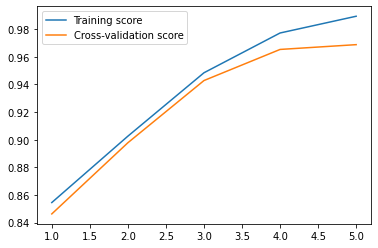

In [19]:
X,y = load_CSV_dataset('segment.csv')
data = split_dataset(X,y)
list_C = [0.01,0.1,1,10,100]
meilleur_paramètre_SVC(data,list_C,'rbf')

### Commentaire : 

Valeur de C retenue est _100_.

CV_result_1 [0.9        0.80769231 0.85271318 0.90697674 0.8372093 ] , Moyenne 0.8609183064997017, Ecart-type 0.03771261435062255
   
CV_result_2 [0.93076923 0.88461538 0.88372093 0.9379845  0.88372093] , Moyenne 0.9041621943947525, Ecart-type 0.02477761414078112
   
CV_result_3 [0.90769231 0.9        0.92248062 0.9379845  0.92248062] , Moyenne 0.9181276088252833, Ecart-type 0.01318862464343797
   
CV_result_4 [0.90769231 0.90769231 0.91472868 0.92248062 0.95348837] , Moyenne 0.9212164579606441, Ecart-type 0.017035087692671893
   
CV_result_5 [0.90769231 0.9        0.9379845  0.9379845  0.95348837] , Moyenne 0.9274299344066786, Ecart-type 0.020217887775998998
   


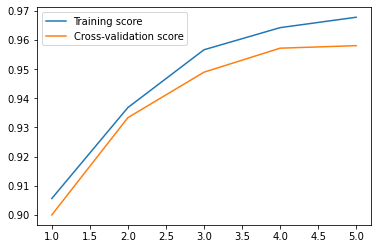

In [20]:
list_C = [0.01,0.1,1,10,100]
meilleur_paramètre_SVC(data,list_C,'linear')

### Commentaire : 

Valeur de C retenue est _10_.

CV_result_1 [0.87692308 0.80769231 0.80620155 0.82170543 0.82170543] , Moyenne 0.826845557543232, Ecart-type 0.0258983468806964
   
CV_result_2 [0.93076923 0.86923077 0.87596899 0.92248062 0.90697674] , Moyenne 0.9010852713178295, Ecart-type 0.024572930759924463
   
CV_result_3 [0.92307692 0.87692308 0.89922481 0.92248062 0.93023256] , Moyenne 0.9103875968992249, Ecart-type 0.019725945809178184
   
CV_result_4 [0.91538462 0.88461538 0.90697674 0.91472868 0.93023256] , Moyenne 0.9103875968992247, Ecart-type 0.014922992621722475
   
CV_result_5 [0.93846154 0.88461538 0.89922481 0.92248062 0.9379845 ] , Moyenne 0.9165533691115086, Ecart-type 0.02142291922417914
   
CV_result_6 [0.93846154 0.9        0.91472868 0.92248062 0.93023256] , Moyenne 0.921180679785331, Ecart-type 0.01320987428162069
   


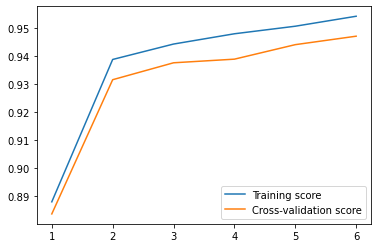

In [21]:
list_C = [0.01,1,2,3,5,10]
meilleur_paramètre_LR(data,list_C)

### Commentaire : 

Valeur de C retenue est _10_.

#### Cinquième Jeu de données.

CV_result_1 [0.60852713 0.60852713 0.60852713 0.61089494 0.60700389] , Moyenne 0.6086960456067325, Ecart-type 0.0012477280489985173
   
CV_result_2 [0.86046512 0.87209302 0.89534884 0.89105058 0.87548638] , Moyenne 0.8788887883449462, Ecart-type 0.012775233562831516
   
CV_result_3 [0.91085271 0.90697674 0.91860465 0.91050584 0.92607004] , Moyenne 0.9146019968027026, Ecart-type 0.00687775203799319
   
CV_result_4 [0.90697674 0.90310078 0.91472868 0.91439689 0.92996109] , Moyenne 0.9138328356408169, Ecart-type 0.009202438578476996
   
CV_result_5 [0.89534884 0.88372093 0.8875969  0.91439689 0.88326848] , Moyenne 0.8928664072632945, Ecart-type 0.01160389286433807
   


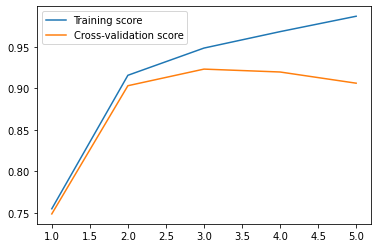

In [22]:
X,y = load_CSV_dataset('spambase.csv')
data = split_dataset(X,y)
list_C = [0.01,0.1,1,10,100]
meilleur_paramètre_SVC(data,list_C,'rbf')

### Commentaire : 

Valeur de C retenue est _1_.

CV_result_1 [0.87596899 0.87596899 0.91085271 0.89105058 0.88715953] , Moyenne 0.8882001628811871, Ecart-type 0.012818337755532207
   
CV_result_2 [0.91860465 0.89147287 0.91085271 0.90272374 0.89883268] , Moyenne 0.9044973305583206, Ecart-type 0.009426323283263933
   
CV_result_3 [0.92248062 0.89922481 0.90310078 0.89105058 0.89883268] , Moyenne 0.9029378940065756, Ecart-type 0.010525137399590092
   
CV_result_4 [0.93023256 0.89147287 0.89922481 0.89105058 0.90272374] , Moyenne 0.9029409103248576, Ecart-type 0.014363749463706542
   
CV_result_5 [0.94186047 0.89922481 0.90310078 0.90272374 0.89494163] , Moyenne 0.9083702832322867, Ecart-type 0.01700124621173717
   


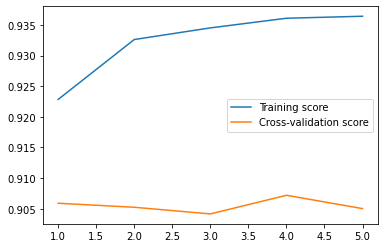

In [23]:
list_C = [0.01,0.1,1,10,100]
meilleur_paramètre_SVC(data,list_C,'linear')

### Commentaire : 

Valeur de C retenue est _1_.

CV_result_1 [0.87209302 0.87596899 0.91085271 0.87937743 0.88715953] , Moyenne 0.8850903387325431, Ecart-type 0.013803970283935348
   
CV_result_2 [0.90697674 0.89147287 0.92635659 0.89494163 0.91439689] , Moyenne 0.9068289445902332, Ecart-type 0.012772953693734506
   
CV_result_3 [0.90697674 0.8875969  0.92248062 0.89883268 0.91050584] , Moyenne 0.9052785569933339, Ecart-type 0.011664557926041793
   
CV_result_4 [0.90697674 0.8875969  0.91860465 0.89883268 0.91050584] , Moyenne 0.9045033631948843, Ecart-type 0.01057335083800869
   
CV_result_5 [0.90697674 0.8875969  0.92248062 0.90272374 0.91050584] , Moyenne 0.9060567671100654, Ecart-type 0.011333660912867255
   
CV_result_6 [0.91472868 0.8875969  0.92248062 0.89494163 0.90272374] , Moyenne 0.9044943142400387, Ecart-type 0.01271346346327172
   


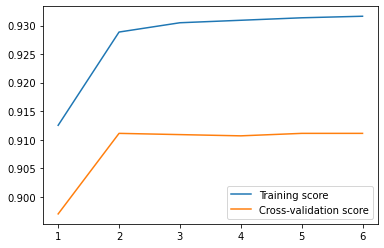

In [24]:
list_C = [0.01,1,2,3,5,10]
meilleur_paramètre_LR(data,list_C)

### Commentaire : 

Valeur de C retenue est _3_.

# Observations:
    
    1. Plus grand est le jeu de données(plus il ya d'instances), mieux est le score du modèle. Ceci dit, certains modèles présenterait une bone capacité de se généraliser s'ils avient plus de données en Apprentissage.

#### _Détermination des hyper-paramètres avec GridSearchCv._

#### a) Pour SVM

In [25]:
def gcv(name):
    X,y = load_CSV_dataset(name)
    data = split_dataset(X,y)

    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)

    model= SVC().fit(x_train,y_train)

    params = {'kernel':('linear', 'rbf'), 'C':[0.01,0.1,1,10,100]}
    maxiter=None
    cv =5
    grid = model_selection.GridSearchCV(model, params, n_jobs=-1, cv=cv) if maxiter is None else model_selection.RandomizedSearchCV(model, params, n_jobs=-1, cv=cv, n_iter=maxiter)
    grid.fit(x_train,y_train)
    print(grid.best_params_)

In [26]:
list_data = ['heart.csv','diabetes.csv','vehicle.csv','segment.csv','spambase.csv']
for i in range(len(list_data)):
    print("data",list_data[i])
    gcv(list_data[i])
    print("")

data heart.csv


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 0.01, 'kernel': 'linear'}

data diabetes.csv


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 10, 'kernel': 'linear'}

data vehicle.csv


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 100, 'kernel': 'rbf'}

data segment.csv


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 10, 'kernel': 'linear'}

data spambase.csv
{'C': 10, 'kernel': 'rbf'}



#### b) Pour Regression Linéaire

In [27]:
def gcv(name):
    X,y = load_CSV_dataset(name)
    data = split_dataset(X,y)

    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)

    model= LogisticRegression().fit(x_train,y_train)

    params = {'C':[0.01,1,2,3,5,10]}
    maxiter=None
    cv =5
    grid = model_selection.GridSearchCV(model, params, n_jobs=-1, cv=cv) if maxiter is None else model_selection.RandomizedSearchCV(model, params, n_jobs=-1, cv=cv, n_iter=maxiter)
    grid.fit(x_train,y_train)
    print(grid.best_params_)

In [28]:
list_data = ['heart.csv','diabetes.csv','vehicle.csv','segment.csv','spambase.csv']
for i in range(len(list_data)):
    print("data",list_data[i])
    gcv(list_data[i])
    print("")

data heart.csv
{'C': 0.01}

data diabetes.csv


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1}

data vehicle.csv


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

{'C': 3}

data segment.csv


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 10}

data spambase.csv
{'C': 3}



## 4. Choisir une ou plusieurs mesures de performances pour estimer les capacités de généralisation des trois méthodes sur chaque base.

Nous allons mesurer la performance de nos modèles en utilisant les hyper-paramètres trouvés.

Pour mésurer la performance de généralisation, nous utilisons principalement la taux de bonne classification en utilsant la fonction de sklearn "_accuracy_score_".

In [29]:
def run_logreg(data):
    if name == "heart.csv":
        C_val= 2
    elif name == "diabetes.csv":
        C_val= 3
    elif name == "vehicle.csv":
        C_val= 5
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 3
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    model = LogisticRegression(C = C_val,random_state=0,max_iter=500).fit(x_train,y_train)
    prediction = model.predict(x_val)
    score = accuracy_score(y_val,prediction)
    return score
    
def run_linsvm(data):
    if name == "heart.csv":
        C_val= 0.01
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 1
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    model = SVC(C = C_val,kernel='linear').fit(x_train,y_train)
    prediction = model.predict(x_val)
    score = accuracy_score(y_val, prediction)
    return score        
    
def run_rbfsvm(data):
    ## Séparer data en train et test avec les meilleurs paramètres
    if name == "heart.csv":
        C_val= 1
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 100
    elif name == "spambase.csv":
        C_val= 10
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    model = SVC(C = C_val,kernel='rbf').fit(x_train,y_train)
    prediction = model.predict(x_val)
    score = accuracy_score(y_val, prediction)
    return score

In [30]:
def process_results(res_logreg , res_linsvm , res_rbfsvm,R):
    ### renvoie le score de chaque modèle avec les bons paramètres sous forme de tableau
    data = {'Régression Logistique':res_logreg,'SVM_Linéaire':res_linsvm,'SVM_Rbf':res_rbfsvm,"Temps d'exécution":R}  
    rep= pd.DataFrame(data, index = ["heart", "diabetes", "vehicle", "segment", "spambase"])  
    print(rep)     
#####
if __name__ == '__main__':
    ds_names = ["heart", "diabetes", "vehicle", "segment", "spambase"]
    res_logreg = []
    res_linsvm = []
    res_rbfsvm = []
    R = []
    for name in ds_names:
        start = time.time()
        name += ".csv"
        #print(name)
        X, y = load_CSV_dataset(name)
        data = split_dataset(X,y)
        ####
        res_logreg.append(run_logreg(data))
        res_linsvm.append(run_linsvm(data))
        res_rbfsvm.append(run_rbfsvm(data))
        end = time.time()
        #print("Temps d'exécution",end - start)
        R.append(end - start)  
        #print("")
    #####
    print("Taux de bonne classification")
    process_results(res_logreg, res_linsvm, res_rbfsvm,R)

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Taux de bonne classification
          Régression Logistique  SVM_Linéaire   SVM_Rbf  Temps d'exécution
heart                  0.815789      0.802632  0.789474           0.034933
diabetes               0.781395      0.781395  0.744186           0.044889
vehicle                0.772152      0.780591  0.789030           0.080172
segment                0.935085      0.945904  0.956723           0.215940
spambase               0.911491      0.912267  0.923137           0.386546


#### Precision comme mesure de performance.

In [31]:
def run_logreg(data):
    if name == "heart.csv":
        C_val= 2
    elif name == "diabetes.csv":
        C_val= 3
    elif name == "vehicle.csv":
        C_val= 5
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 3
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    model = LogisticRegression(C = C_val,random_state=0,max_iter=500).fit(x_train,y_train)
    prediction = model.predict(x_val)
    score = precision_score(y_val,prediction,average='macro')
    return score
    
def run_linsvm(data):
    if name == "heart.csv":
        C_val= 0.01
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 1
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    model = SVC(C = C_val,kernel='linear').fit(x_train,y_train)
    prediction = model.predict(x_val)
    score = precision_score(y_val, prediction,average='macro')
    return score        
    
def run_rbfsvm(data):
    ## Séparer data en train et test avec les meilleurs paramètres
    if name == "heart.csv":
        C_val= 1
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 100
    elif name == "spambase.csv":
        C_val= 10
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    model = SVC(C = C_val,kernel='rbf').fit(x_train,y_train)
    prediction = model.predict(x_val)
    score = precision_score(y_val, prediction,average='macro')
    return score

In [32]:
if __name__ == '__main__':
    ds_names = ["heart", "diabetes", "vehicle", "segment", "spambase"]
    res_logreg = []
    res_linsvm = []
    res_rbfsvm = []
    R = []
    for name in ds_names:
        start = time.time()
        name += ".csv"
        #print(name)
        X, y = load_CSV_dataset(name)
        data = split_dataset(X,y)
        ####
        res_logreg.append(run_logreg(data))
        res_linsvm.append(run_linsvm(data))
        res_rbfsvm.append(run_rbfsvm(data))
        end = time.time()
        #print("Temps d'exécution",end - start)
        R.append(end - start)  
        #print("")
    #####
    print("Précision")
    process_results(res_logreg, res_linsvm, res_rbfsvm,R)

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Précision
          Régression Logistique  SVM_Linéaire   SVM_Rbf  Temps d'exécution
heart                  0.823115      0.828869  0.802151           0.033942
diabetes               0.757153      0.757153  0.715685           0.050872
vehicle                0.768117      0.780964  0.795068           0.085537
segment                0.934734      0.946735  0.955661           0.215255
spambase               0.908062      0.909013  0.923423           0.374912


####  Recall comme mesure de performance.

In [33]:
def run_logreg(data):
    if name == "heart.csv":
        C_val= 2
    elif name == "diabetes.csv":
        C_val= 3
    elif name == "vehicle.csv":
        C_val= 5
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 3
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    model = LogisticRegression(C = C_val,random_state=0,max_iter=500).fit(x_train,y_train)
    prediction = model.predict(x_val)
    score = recall_score(y_val,prediction,average='macro')
    return score
    
def run_linsvm(data):
    if name == "heart.csv":
        C_val= 0.01
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 1
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    model = SVC(C = C_val,kernel='linear').fit(x_train,y_train)
    prediction = model.predict(x_val)
    score = recall_score(y_val, prediction,average='macro')
    return score        
    
def run_rbfsvm(data):
    ## Séparer data en train et test avec les meilleurs paramètres
    if name == "heart.csv":
        C_val= 1
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 100
    elif name == "spambase.csv":
        C_val= 10
    x_train,x_val,y_train,y_val = train_test_split(data[0],data[2],test_size=.40, random_state=41)
    model = SVC(C = C_val,kernel='rbf').fit(x_train,y_train)
    prediction = model.predict(x_val)
    score = recall_score(y_val, prediction,average='macro')
    return score

In [41]:
if __name__ == '__main__':
    ds_names = ["heart", "diabetes", "vehicle", "segment", "spambase"]
    res_logreg = []
    res_linsvm = []
    res_rbfsvm = []
    R = []
    C_val = 1 # Par défaut
    for name in ds_names:
        start = time.time()
        name += ".csv"
        #print(name)
        X, y = load_CSV_dataset(name)
        data = split_dataset(X,y)
        ####
        res_logreg.append(run_logreg(data))
        res_linsvm.append(run_linsvm(data))
        res_rbfsvm.append(run_rbfsvm(data))
        end = time.time()
        #print("Temps d'exécution",end - start)
        R.append(end - start)  
    #####
    print("Rappel ou sensibilité")
    process_results(res_logreg, res_linsvm, res_rbfsvm,R)

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Rappel ou sensibilité
          Régression Logistique  SVM_Linéaire   SVM_Rbf  Temps d'exécution
heart                  0.817741      0.806306  0.792100           0.035902
diabetes               0.747974      0.747974  0.719805           0.047905
vehicle                0.778273      0.785188  0.796659           0.082173
segment                0.933580      0.944514  0.955803           0.235327
spambase               0.905683      0.906321  0.914541           0.383374


### _Commentaires:_

Nous pouvons retenir ici que le jeu de données _"diabètes"_ présente un faible taux de rappel et de la précision par rapport au taux de bonne classifiaction.

## 5. Présenter, analyser et commenter les résultats obtenus.

### _Présentation des résultats obtenus avec comme mesure de performance accuracy_




 Nous allons à nouveau faire l'apprentissage en utilisant les valeurs des hyper-paramètres choisis avec l'ensemble de données d'Apprentissage puis évaluer avec les données de Test.

In [42]:
def run_logreg(data):
    if name == "heart.csv":
        C_val= 2
    elif name == "diabetes.csv":
        C_val= 3
    elif name == "vehicle.csv":
        C_val= 5
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 3
    model = LogisticRegression(C = C_val,random_state=0,max_iter=500).fit(data[0],data[2])
    prediction = model.predict(data[1])
    score = accuracy_score(data[3], prediction)
    return score
    
def run_linsvm(data):
    if name == "heart.csv":
        C_val= 0.01
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 1
    model = SVC(C = C_val,kernel='linear').fit(data[0],data[2])
    prediction = model.predict(data[1])
    score = accuracy_score(data[3], prediction)
    return score        
    
def run_rbfsvm(data):
    ## Séparer data en train et test avec les meilleurs paramètres
    if name == "heart.csv":
        C_val= 1
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 100
    elif name == "spambase.csv":
        C_val= 10
    model = SVC(C = C_val,kernel='rbf').fit(data[0],data[2])
    prediction = model.predict(data[1])
    score = accuracy_score(data[3], prediction)
    return score

In [44]:
if __name__ == '__main__':
    ds_names = ["heart", "diabetes", "vehicle", "segment", "spambase"]
    res_logreg = []
    res_linsvm = []
    res_rbfsvm = []
    R = []
    C_val = 1 # Par défaut
    for name in ds_names:
        start = time.time()
        name += ".csv"
        #print(name)
        X, y = load_CSV_dataset(name)
        data = split_dataset(X,y)
        ####
        res_logreg.append(run_logreg(data))
        res_linsvm.append(run_linsvm(data))
        res_rbfsvm.append(run_rbfsvm(data))
        end = time.time()
        #print("Temps d'exécution",end - start)
        R.append(end - start)  
        #print("")
    ##### 
    print("-----------    RESULTATS FINAUX    -------------")
    process_results(res_logreg, res_linsvm, res_rbfsvm,R)

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

-----------    RESULTATS FINAUX    -------------
          Régression Logistique  SVM_Linéaire   SVM_Rbf  Temps d'exécution
heart                  0.839506      0.864198  0.827160           0.030889
diabetes               0.761905      0.770563  0.770563           0.066819
vehicle                0.803150      0.826772  0.838583           0.129460
segment                0.948052      0.961039  0.949495           0.349051
spambase               0.945692      0.944967  0.946416           0.884437


### COMMENTAIRES:
    
1. Dans l'ensemble, la capacité de généralisation de différents modèles est bonne. Les taux de bonne classification pour les données de test sont meilleurs qu'en apprentissage.

2. Le jeu de données "diabetes" par contre, présente un faible taux de bonne classification pour les données de tests qu'en Apprentissage pour les 3 modèles.

En se référant aux taux de recall et precision, nous pouvons dire que les modèles ne sont pas très précis. Ces modèles n'ont pas une bonne capacité de généralisation. Néanmoins, la différence de ces valeurs n'est pas très grande.


### Analyse et commentaire des résultats obtenus

Nous allons dans cette section effetué une comparaison entre les différents modèles pour chacun de nos jeux de données.

    Nous pouvons maintenant utiliser un test d'hypothèse(_test statistique de significativité_) pour voir si les résultats observés sont statistiquement significatifs.
    
    Nous allons utiliser le test " Le test F combiné 5x2cv" pour comparer les deux meilleurs modèles pour chacun de jeux de données et en retenir un.

### Test d'hypothèse

In [46]:
def logreg(name):
    X,y = load_CSV_dataset(name)
    data = split_dataset(X,y)
    if name == "heart.csv":
        C_val= 2
    elif name == "diabetes.csv":
        C_val= 3
    elif name == "vehicle.csv":
        C_val= 5
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 3
    model = LogisticRegression(C = C_val,random_state=0,max_iter=500).fit(data[0],data[2])
    return model
    
def linsvm(name):
    X,y = load_CSV_dataset(name)
    data = split_dataset(X,y)
    if name == "heart.csv":
        C_val= 0.01
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 10
    elif name == "spambase.csv":
        C_val= 1
    model = SVC(C = C_val,kernel='linear').fit(data[0],data[2])
    
    return model        
    
def rbfsvm(name):
    X,y = load_CSV_dataset(name)
    data = split_dataset(X,y)
    if name == "heart.csv":
        C_val= 1
    elif name == "diabetes.csv":
        C_val= 10
    elif name == "vehicle.csv":
        C_val= 10
    elif name == "segment.csv":
        C_val= 100
    elif name == "spambase.csv":
        C_val= 10
    model = SVC(C = C_val,kernel='rbf').fit(data[0],data[2])
    
    return model

In [47]:
def test_Stat(name,model1,model2):
    X,y = load_CSV_dataset(name)
    t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
    print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
    print(" ")
    if p <= 0.05:
        print('La différence entre les performances moyennes est probablement réelle.On retient le modèle avec le meilleur score.')
    else:
        print('Les algorithmes ont probablement les mêmes performances. Retenir le premier ou le second modèle revient à la même chose.')

In [49]:
name = 'heart.csv'
model1=logreg(name)
model2=linsvm(name)
test_Stat(name,model1,model2)
print("SVM Linéaire")

P-value: 0.018, t-Statistic: -3.450
 
La différence entre les performances moyennes est probablement réelle.On retient le modèle avec le meilleur score.
SVM Linéaire


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
name = 'diabetes.csv'
model1=rbfsvm(name)
model2=logreg(name)
test_Stat(name,model1,model2)
print("SVM RBF")

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


P-value: 0.002, t-Statistic: -5.626
 
La différence entre les performances moyennes est probablement réelle.On retient le modèle avec le meilleur score.
SVM RBF


In [53]:
name = 'vehicle.csv'
model1=rbfsvm(name)
model2=linsvm(name)
test_Stat(name,model1,model2)
print("svm linéaire ou rbf")

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


P-value: 0.366, t-Statistic: 0.993
 
Les algorithmes ont probablement les mêmes performances. Retenir le premier ou le second modèle revient à la même chose.
svm linéaire ou rbf


In [55]:
name = 'segment.csv'
model1=rbfsvm(name)
model2=linsvm(name)
test_Stat(name,model1,model2)
print("SVM LINEAIRE")

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


P-value: 0.018, t-Statistic: 3.448
 
La différence entre les performances moyennes est probablement réelle.On retient le modèle avec le meilleur score.
SVM LINEAIRE


In [57]:
name = 'spambase.csv'
model1=rbfsvm(name)
model2=logreg(name)
test_Stat(name,model1,model2)
print("SVM ou Regréssion logiqtique")

P-value: 0.865, t-Statistic: -0.179
 
Les algorithmes ont probablement les mêmes performances. Retenir le premier ou le second modèle revient à la même chose.
SVM ou Regréssion logiqtique
